# Methodological Approach

## Research Question
How do higher educaiton leaders leverage data to assess the vitility and health of institutions? 

### Data Collection Methods

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import zipfile, io
import yaml
import json 

In [2]:
folder_name = r'../data'

# make a folder if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# pass the url for the zipfile from data.gov
url = r'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip'
response = requests.get(url, stream = True)

# extract contents
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
    for elem in zf.namelist():
        zf.extract(elem, '../data')

In [3]:
df_raw = pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv', low_memory = False)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1986 entries, UNITID to SCUGFFN_POOLED
dtypes: float64(1931), int64(12), object(43)
memory usage: 107.8+ MB


In [4]:
df_raw.isnull().any()

UNITID                      False
OPEID                       False
OPEID6                      False
INSTNM                      False
CITY                        False
                            ...  
SCUGFFN                      True
POOLYRS_FTFTAIDPCT           True
FTFTPCTPELL_POOLED_SUPP      True
FTFTPCTFLOAN_POOLED_SUPP     True
SCUGFFN_POOLED               True
Length: 1986, dtype: bool

In [8]:
df_raw.shape

(7112, 1986)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1986 entries, UNITID to SCUGFFN_POOLED
dtypes: float64(1931), int64(12), object(43)
memory usage: 107.8+ MB


In [78]:
cols_of_interest = ['UNITID', 'INSTNM', 'STABBR', 'HIGHDEG', 'PREDDEG', 'CONTROL',  
                    'TUITFTE', 'AVGFACSAL', 'ADM_RATE_ALL', 'UGDS', 'UG25ABV', 'PCTFLOAN', 'CDR3', 
                    'GRAD_DEBT_MDN']

data_of_interest = df_raw[cols_of_interest]

In [79]:
df_clean = data_of_interest.copy()

df_clean.rename( columns = lambda col: col.strip().lower(), inplace = True )

In [80]:
df_clean.isnull().any()

unitid           False
instnm           False
stabbr           False
highdeg          False
preddeg          False
control          False
tuitfte           True
avgfacsal         True
adm_rate_all      True
ugds              True
ug25abv           True
pctfloan          True
cdr3              True
grad_debt_mdn     True
dtype: bool

In [81]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unitid         7112 non-null   int64  
 1   instnm         7112 non-null   object 
 2   stabbr         7112 non-null   object 
 3   highdeg        7112 non-null   int64  
 4   preddeg        7112 non-null   int64  
 5   control        7112 non-null   int64  
 6   tuitfte        6649 non-null   float64
 7   avgfacsal      4245 non-null   float64
 8   adm_rate_all   2250 non-null   float64
 9   ugds           6364 non-null   float64
 10  ug25abv        6293 non-null   float64
 11  pctfloan       6342 non-null   float64
 12  cdr3           6168 non-null   float64
 13  grad_debt_mdn  6973 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 778.0+ KB


In [82]:
df_clean.stabbr.unique()


array(['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT', 'NY',
       'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'MI', 'IA', 'KS',
       'MO', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NC', 'ND', 'OH', 'WV', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'FM', 'PW', 'VI', 'MH'], dtype=object)

In [83]:
l = list(df_clean.stabbr.unique())

df_clean['stabbr'] = pd.Categorical(df_clean.stabbr, categories = l, ordered = False)

In [84]:
# replace the numeric encodings by their categorical value as above
df_clean['highdeg'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's", 
                                                       4:"Graduate's"}, 
                                         inplace = True)

df_clean['preddeg'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's", 
                                                       4:"Graduate's"}, 
                                         inplace = True)
df_clean.control.replace(to_replace = {1: 'Public', 2: 'Private Nonprofit', 3: 'Private For-Profit'}, inplace = True)

In [85]:
df_clean.highdeg.value_counts(), df_clean.preddeg.value_counts(), df_clean.control.value_counts()


(highdeg
 Certificate    2279
 Graduate's     2052
 Associate's    1518
 Bachelor's      788
 Name: count, dtype: int64,
 preddeg
 Certificate    3011
 Bachelor's     2109
 Associate's    1234
 Graduate's      310
 Name: count, dtype: int64,
 control
 Private For-Profit    2995
 Public                2076
 Private Nonprofit     2041
 Name: count, dtype: int64)

In [86]:
df_clean['highdeg'] = pd.Categorical(df_clean.highdeg, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)
df_clean['preddeg'] = pd.Categorical(df_clean.preddeg, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)
df_clean['control'] = pd.Categorical(df_clean.control, categories = ['Public', 'Private Nonprofit', 'Private For-Profit'],
                                    ordered = False)

### Data Analysis

In [87]:
df = df_clean.copy()

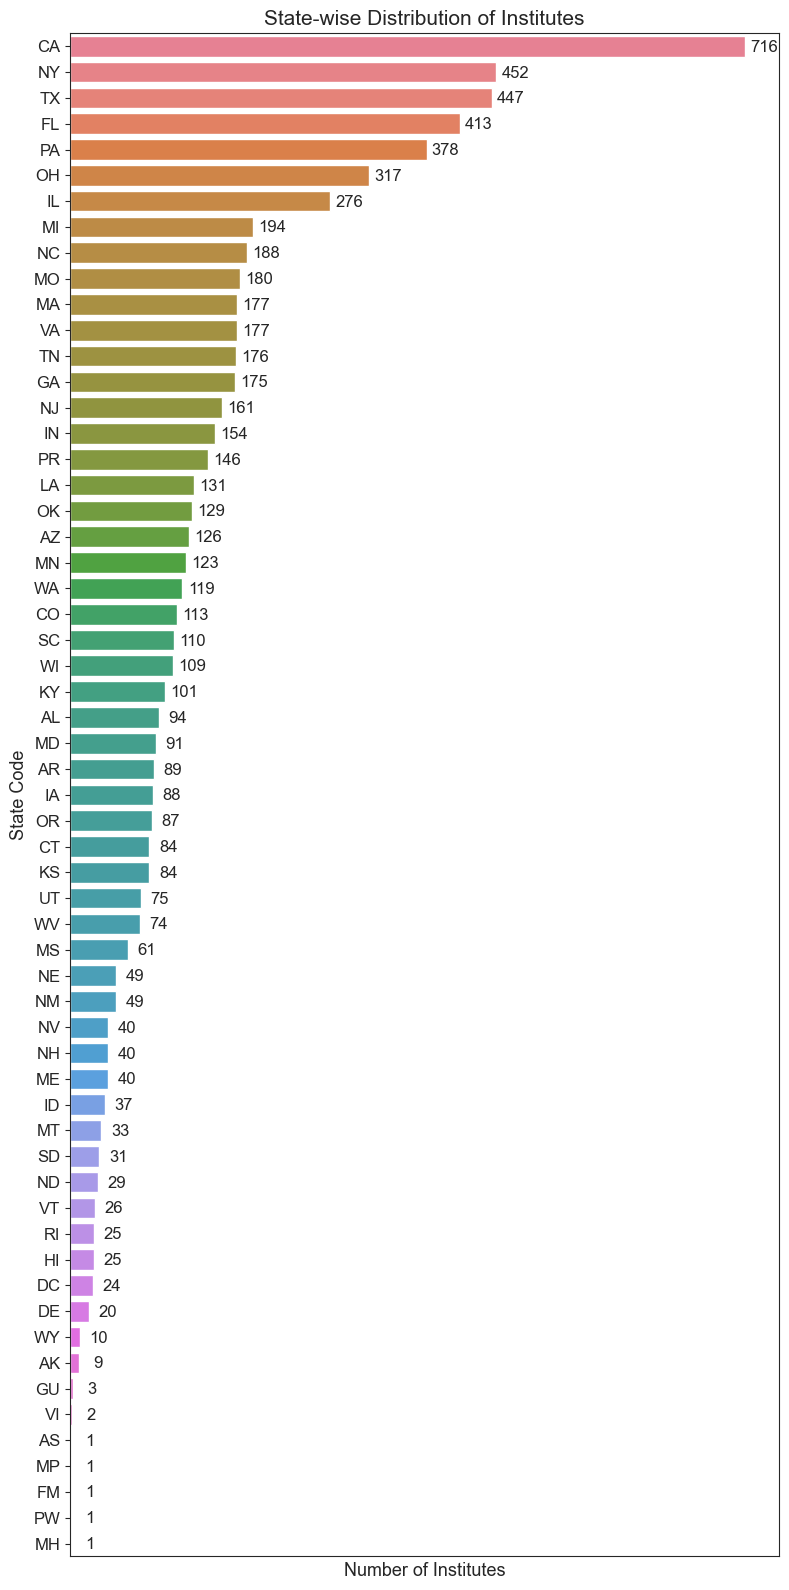

In [90]:
sns.set_style('ticks')
plt.figure(figsize = (8, 16))

# plot
ax = sns.barplot(x = df.stabbr.value_counts().values, y = list(df.stabbr.value_counts().index), 
           hue = sb.color_palette('gnuplot_r', len(df.stabbr.value_counts())), legend=False)

# annotate the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center', fontsize = 12)

# label the plot
plt.title('State-wise Distribution of Institutes', fontsize = 15)
plt.xlabel('Number of Institutes', fontsize = 13)
plt.ylabel('State Code', fontsize = 13)
plt.xticks([], [])
plt.yticks(fontsize = 12)

plt.tight_layout();

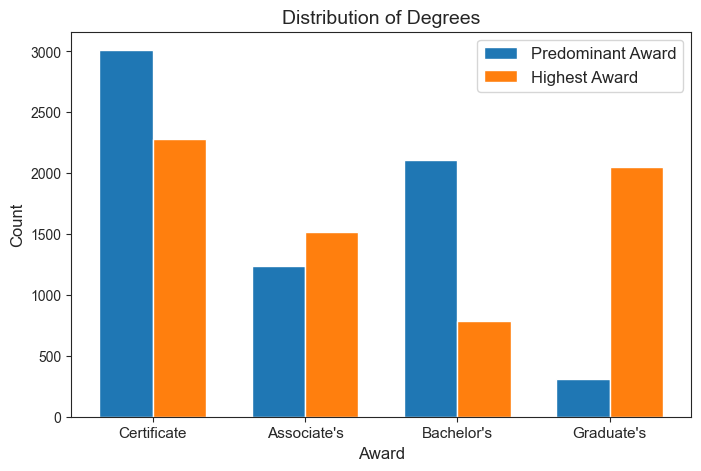

In [91]:
# initialize the number of categories to plot
N = 4

# separate out the counts for preddeg and highdeg
preddeg_counts = df.preddeg.value_counts(sort = False).values
highdeg_counts = df.highdeg.value_counts(sort = False).values

# get the locations to plot bars at and specify the width of each bar
ind = np.arange(N)
width = 0.35

# specify the color palettes and make subplots for each preddeg and highdeg
c1, c2 = sns.color_palette()[0], sb.color_palette()[1]
fig, ax = plt.subplots(figsize = (8,5))

# plot
rects1 = ax.bar(ind, preddeg_counts, width, color = c1)
rects2 = ax.bar(ind + width, highdeg_counts, width, color = c2)

# specify the tick locations
ax.set_xticks(ind + width / 2)

# label
ax.set_xticklabels(("Certificate", "Associate's", "Bachelor's", "Graduate's"), fontsize = 11)
ax.legend( (rects1[0], rects2[0]), ('Predominant Award', 'Highest Award'), fontsize = 12 )
plt.title('Distribution of Degrees', fontsize = 14)
plt.xlabel('Award', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

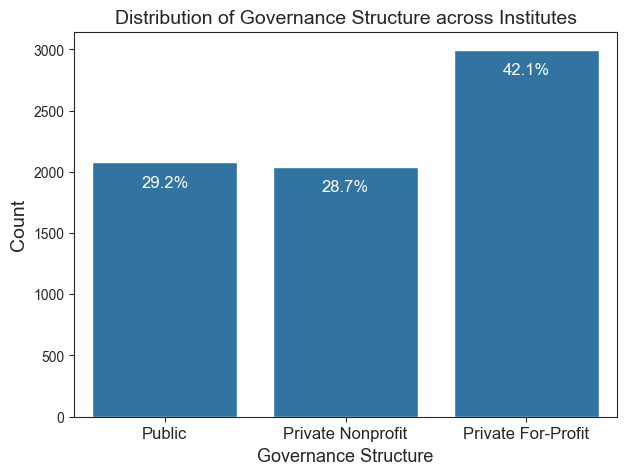

In [92]:
# plot
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x = 'control', color = sb.color_palette()[0])

# annotate
n_points = df.shape[0]
cat_counts = df.control.value_counts()
locs, labels = plt.xticks()                # get current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / n_points)
    
    # print the annotations below the top of the bar
    plt.text(loc, count-200, pct_string, ha = 'center', color = 'w', fontsize = 12)
    
# label
plt.title('Distribution of Governance Structure across Institutes', fontsize = 14)
plt.xticks(fontsize = 12)
plt.xlabel("Governance Structure", fontsize = 13)
plt.ylabel('Count', fontsize = 14);

<Figure size 800x800 with 0 Axes>

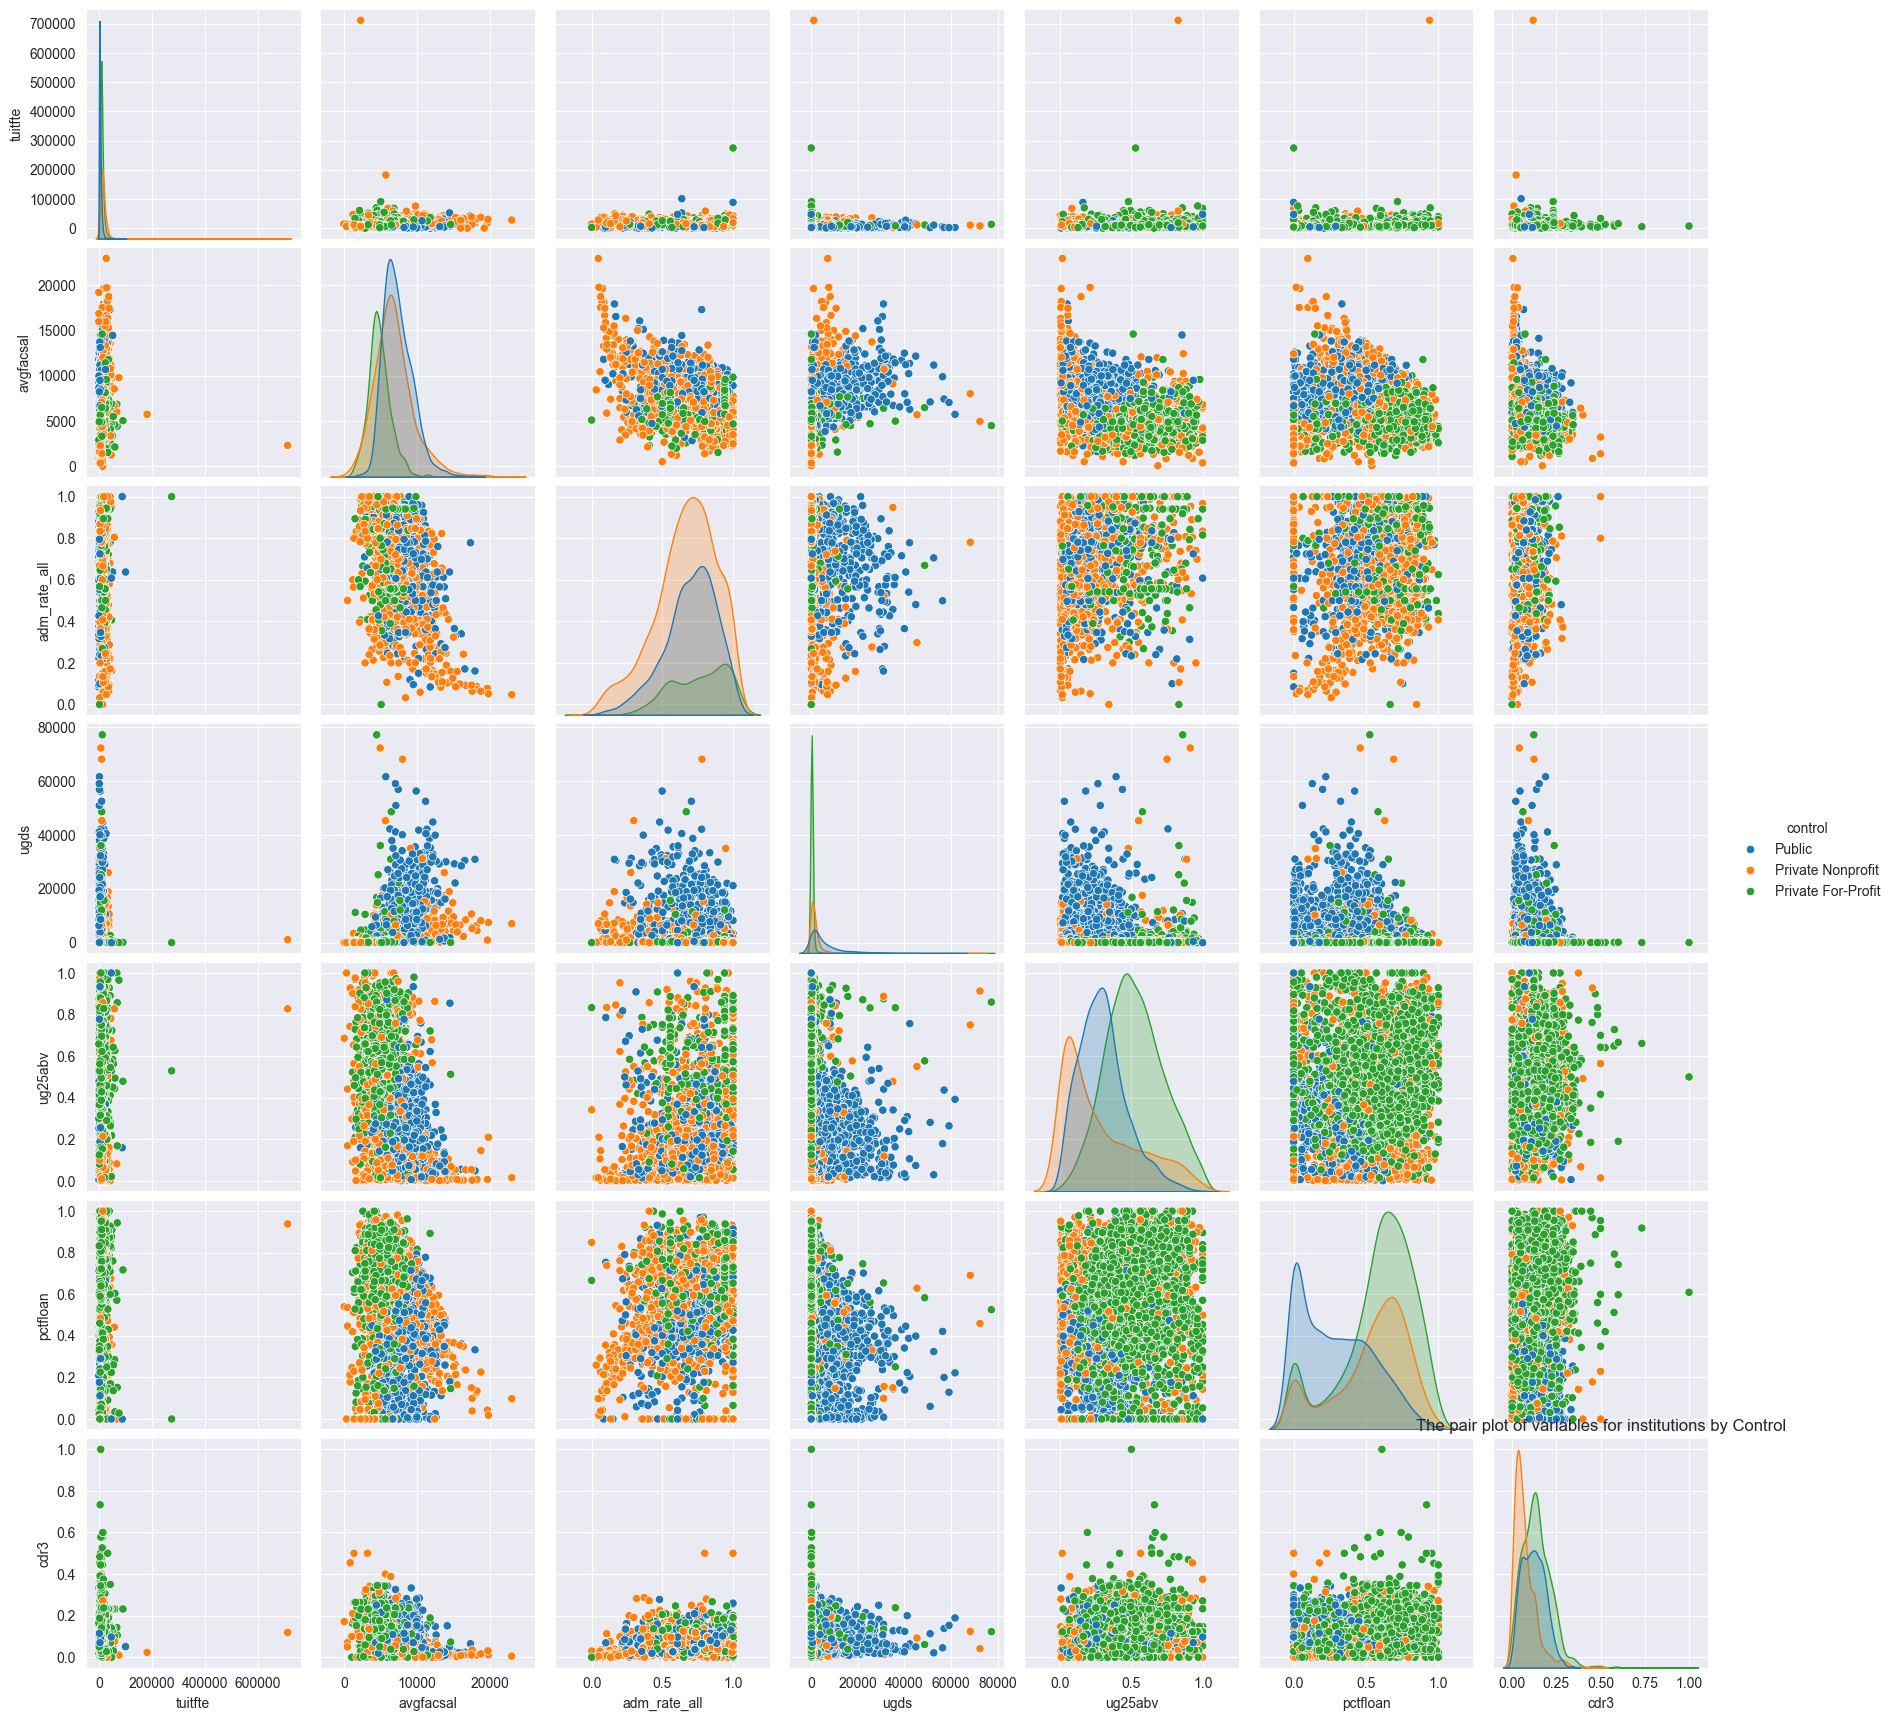

In [111]:
plt.figure(figsize = (8, 8))

sns.pairplot(df[['control','tuitfte', 'avgfacsal', 'adm_rate_all', 'ugds', 'ug25abv', 'pctfloan', 'cdr3', 'grad_debt_mdn']],
             hue = 'control')

plt.title('The pair plot of variables for institutions by Control')
plt.xlabel('Variables', fontsize = 12)
plt.ylabel('Variables', fontsize = 12);

plt.show()

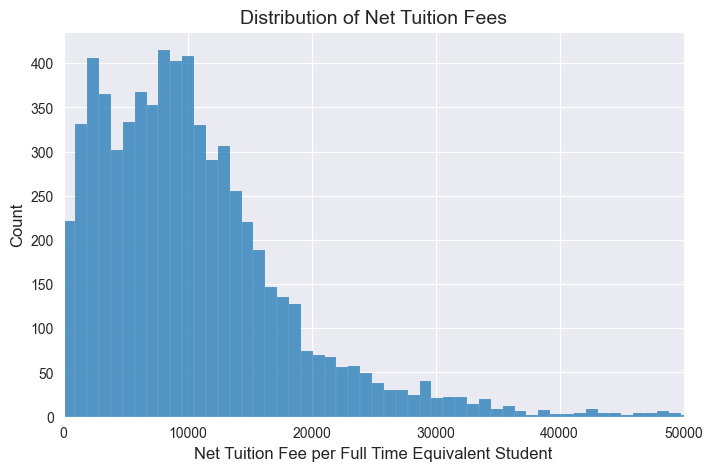

In [153]:
plt.figure(figsize = (8,5))

# plot
sns.histplot(data = df, x = 'tuitfte');
plt.xlim(0,50000)

# label
plt.title('Distribution of Net Tuition Fees', fontsize = 14)
plt.xlabel('Net Tuition Fee per Full Time Equivalent Student', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

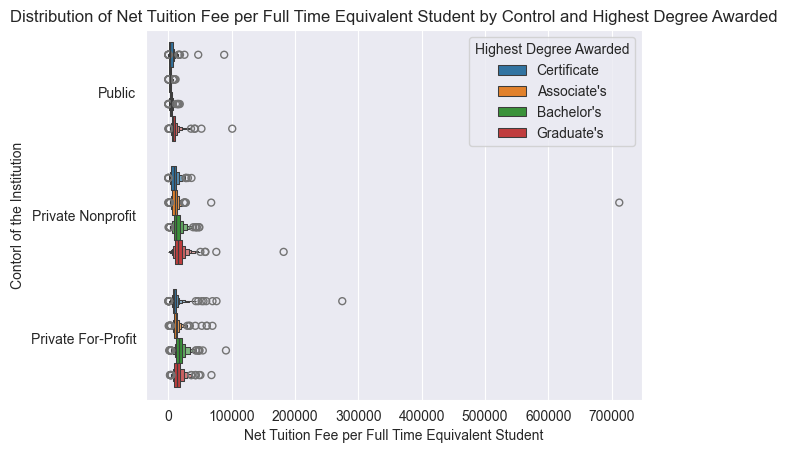

In [162]:
sns.boxenplot(df, 
              y = 'control', 
              x = 'tuitfte',
              hue = 'highdeg')

plt.title('Distribution of Net Tuition Fee per Full Time Equivalent Student by Control and Highest Degree Awarded')
plt.xlabel('Net Tuition Fee per Full Time Equivalent Student')
plt.ylabel('Contorl of the Institution')
plt.legend(title = 'Highest Degree Awarded')

plt.show()

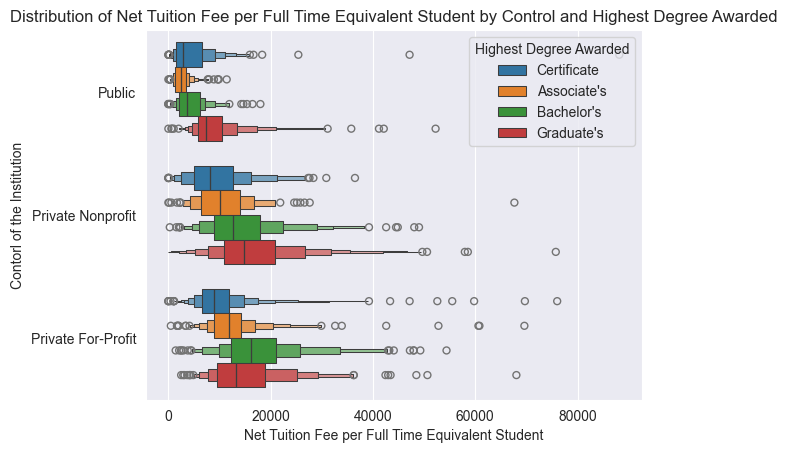

In [172]:
sns.boxenplot(df[df.tuitfte <= 90000], 
              y = 'control', 
              x = 'tuitfte',
              hue = 'highdeg')

plt.title('Distribution of Net Tuition Fee per Full Time Equivalent Student by Control and Highest Degree Awarded')
plt.xlabel('Net Tuition Fee per Full Time Equivalent Student')
plt.ylabel('Contorl of the Institution')
plt.legend(title = 'Highest Degree Awarded')

plt.show()

<Figure size 800x600 with 0 Axes>

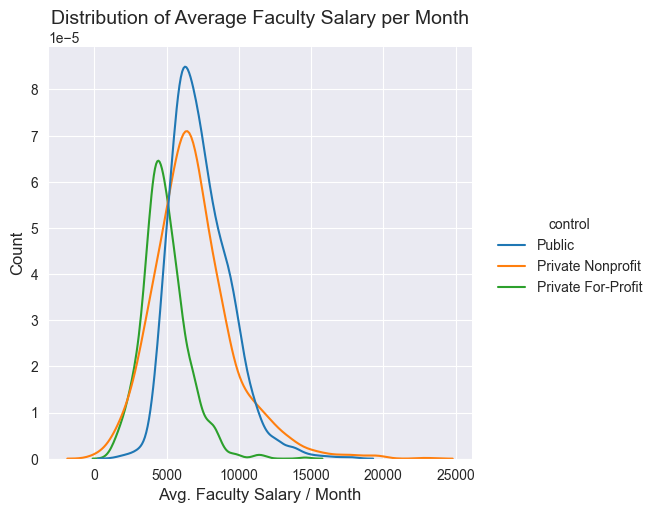

In [164]:
# plot
plt.figure(figsize = (8, 6))
sns.displot(data = df, x = 'avgfacsal', hue = 'control',
           kind="kde")

# label
plt.title('Distribution of Average Faculty Salary per Month', fontsize = 14)
plt.xlabel('Avg. Faculty Salary / Month', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.show()

In [141]:
for i in df['control'].unique():
    print('The median Avg. {0} Faculty Salary per month is: $'.format(i) + str(df[df['control']==i].avgfacsal.median()))

The median Avg. Public Faculty Salary per month is: $7021.5
The median Avg. Private Nonprofit Faculty Salary per month is: $6493.5
The median Avg. Private For-Profit Faculty Salary per month is: $4671.0


In [144]:
pd.pivot_table(df, 
               index = 'control',
               columns = 'preddeg', 
               values = 'avgfacsal',
               aggfunc = 'mean')

preddeg,Certificate,Associate's,Bachelor's,Graduate's
control,,,,
Public,6206.348592,6772.204819,8503.641541,12083.812500
Private Nonprofit,4650.904110,5108.193939,7057.575904,7474.488152
Private For-Profit,4385.785536,4595.710345,6075.724324,6044.096774


<Figure size 800x600 with 0 Axes>

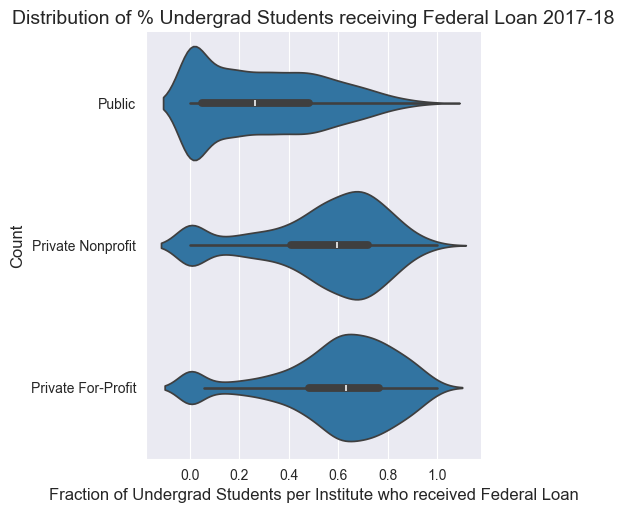

In [177]:
# plot
plt.figure(figsize = (8, 6))
sns.catplot(data = df, x = 'pctfloan', y = 'control',
            kind = 'violin')

# label
plt.title('Distribution of % Undergrad Students receiving Federal Loan 2017-18', fontsize = 14)
plt.xlabel('Fraction of Undergrad Students per Institute who received Federal Loan', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

<Figure size 800x600 with 0 Axes>

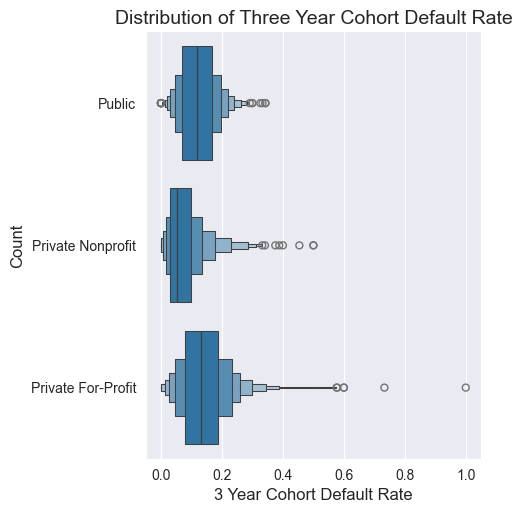

In [184]:
# plot
plt.figure(figsize = (8, 6))
sns.catplot(data = df, x = 'cdr3',
            y = 'control', kind = 'boxen')

# label
plt.title('Distribution of Three Year Cohort Default Rate', fontsize = 14)
plt.xlabel('3 Year Cohort Default Rate', fontsize = 12)
plt.ylabel('Count', fontsize= 12)

plt.show()

### Managing Data

In [185]:
# Use the data.YAML file to create a readable data set for use by the chat bot
with open('//users//mgreen2//Documents//Projects//data//CollegeScorecard_Raw_Data//data.yaml') as f:
    result = yaml.safe_load(f)

# Create the data dictionary from the YAML file
d_d = result['dictionary']

# Convert the dictionary into a pandas dataframe
t = pd.DataFrame(d_d)
t2 = t.loc[['source', 'description']].T.reset_index()

# Create a dictionary of the column names with the dictionary from YAML file
cols_clean = dict(zip(t2.source, t2.description))

In [186]:
# Read all the zip files and create one dataframe
df_raw = pd.DataFrame()
file_path = '//users//mgreen2//Documents//Projects//data//CollegeScorecard_Raw_Data//'

for i in os.listdir(file_path):
    if i.startswith('MERGED'):
        temp_df = pd.read_csv(file_path + i, low_memory = False)
        temp_df['Table'] = i
        df_raw = pd.concat([df_raw, temp_df])

# Clean the values in the data file

In [187]:
df_raw['HIGHDEG'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's", 
                                        4:"Graduate's"}, 
                                         inplace = True)

df_raw['PREDDEG'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's", 
                                                       4:"Graduate's"}, 
                                         inplace = True)

In [188]:
df_raw['HIGHDEG'] = pd.Categorical(df_raw.HIGHDEG, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)

df_raw['PREDDEG'] = pd.Categorical(df_raw.PREDDEG, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)

In [189]:
df_raw.CONTROL.replace(to_replace = {1: 'Public', 2: 'Private Nonprofit', 3: 'Private For-Profit'}, inplace = True)

df_raw['CONTROL'] = pd.Categorical(df_raw.CONTROL, categories = ['Public', 'Private Nonprofit', 'Private For-Profit'],
                                    ordered = False)


In [190]:
df_raw.DISTANCEONLY.replace(to_replace = {0.0: 'No', 1.0: 'Yes'}, inplace = True)
df_raw['DISTANCEONLY'] = pd.Categorical(df_raw.DISTANCEONLY, categories = ['No', 'Yes'], ordered = False)

In [191]:
df_raw.MAIN.replace(to_replace = {0.0: 'Not main campus', 1.0: 'Main campus'}, inplace = True)
df_raw['MAIN'] = pd.Categorical(df_raw.MAIN, categories = ['Not main campus', 'Main campus'], ordered = False)

In [192]:
df_raw.CONTROL.replace(to_replace= {1: 'Public', 2: 'Priavte nonprofit', 3: 'Private for-profit'}, inplace=True)

# Work Smarter not Harder

In [194]:
# Define a fuction that will take my saved values from the data dictionary Excel file and create a dictionary to use for the value clean up
def cat_cleanup():
    df = pd.read_clipboard(header=None)
    dt = dict(zip(df[0], df[1]))

    return dt

relafil = pd.read_clipboard(header=None)

In [195]:
rel_d = dict(zip(relafil[0], relafil[1]))

df_raw['RELAFFIL'].replace(to_replace = rel_d, inplace=True)

In [196]:
st_fips = pd.read_clipboard(header=None)
st_d = dict(zip(st_fips[0], st_fips[1]))

df_raw['ST_FIPS'].replace(to_replace=st_d, inplace=True)

In [197]:
reg = pd.read_clipboard(header=None)
reg_d = dict(zip(reg[0], reg[1]))

df_raw['REGION'].replace(to_replace = reg_d, inplace=True)

In [198]:
loc = pd.read_clipboard(header=None)
loc_d = dict(zip(loc[0], loc[1])) 

df_raw['LOCALE'].replace(to_replace=loc_d, inplace=True)

In [199]:
loc2 = cat_cleanup()
df_raw['LOCALE2'].replace(to_replace=loc2, inplace=True)

In [200]:
ccbas = cat_cleanup()
df_raw['CCBASIC'].replace(to_replace=ccbas, inplace=True)

In [201]:
ccug = cat_cleanup()
df_raw['CCUGPROF'].replace(to_replace=ccug, inplace=True)

In [202]:
ccsi = cat_cleanup()
df_raw['CCSIZSET'].replace(to_replace=ccsi, inplace=True)

In [203]:
# Create a function to now replace the column names with the long names. 
def replace_column_names(dataframe, columns_mapping):
    return dataframe.rename(columns=columns_mapping)

df_clean = replace_column_names(df_raw, cols_clean)

In [204]:
# The files do not include an academic year. Create the column variable from the file name and create a derived academic year value.
df_clean['Academic Year'] = df_clean.Table.str[6:].str[:-7]
df_clean['Academic Year'] = df_clean['Academic Year'].str.replace('_', '-')

In [205]:
# The dataset was missing data from rows with institutional characteristics. Clean this up through sorthing the dataframe and then backfilling the data. 
df_clean.sort_values(by = ['Unit ID for institution', 'Academic Year'], inplace=True)
df_clean.iloc[:, :36] = df_clean.iloc[:, :36].fillna(method='bfill')

# Remove columns
df_f = df_clean.reset_index()
df_f.drop(columns = ['index', 'Table'], inplace=True)

/var/folders/jn/9grpk9zx7zg5679w1gvmw9b00000gp/T/ipykernel_19382/1815271507.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.iloc[:, :36] = df_clean.iloc[:, :36].fillna(method='bfill')


In [206]:
# Save a local copy of the cleaned dataset
df_f.to_csv('Full Dataset.csv', index=False)

### Here's where I ran into some trouble. The dataset was simply too large for use with the chatbot. The resulting file was roughly 3 GB of data and the max file size for a Github repository is 25 MB or 123 times too large. 

In [251]:
#Load up a new clean file to use 
df = pd.read_csv('Full Dataset.csv', low_memory=False)

# Convert the file to a smaller dataframe by looking at five years of data for Holy Family only.
df2 = df[df['Academic Year'].isin(['2017-18','2016-17', '2015-16', '2014-2015', '2013-14'])]

In [253]:
# More 🧹
df2.rename(columns = 
{"""Predominant undergraduate degree awarded
 0 Not classified
 1 Predominantly certificate-degree granting
 2 Predominantly associate's-degree granting
 3 Predominantly bachelor's-degree granting
 4 Entirely graduate-degree granting"""
 :
 'Predominant undergraduate degree awarded',
"""Highest degree awarded
 0 Non-degree-granting
 1 Certificate degree
 2 Associate degree
 3 Bachelor's degree
 4 Graduate degree"""
 : 
 "Highest degree awarded"}, inplace=True
          )

/var/folders/jn/9grpk9zx7zg5679w1gvmw9b00000gp/T/ipykernel_19382/2666691262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns =


In [254]:
# Focus on Holy Famiyl University (UNITID = 212984) 
df3 = df2[df2['Unit ID for institution'] == 212984]

In [255]:
#Time to find out the columns that are, as T Swift would say, Blanks Spaces
for i in df3.columns:
    print('The column {0} is this percent blank '.format(i) + str(df3[i].isna().mean()))

The column Unit ID for institution is this percent blank 0.0
The column 8-digit OPE ID for institution is this percent blank 0.0
The column 6-digit OPE ID for institution is this percent blank 0.0
The column Institution name is this percent blank 0.0
The column City is this percent blank 0.0
The column State postcode is this percent blank 0.0
The column ZIP code is this percent blank 0.0
The column Accreditor for institution is this percent blank 0.0
The column URL for institution's homepage is this percent blank 0.0
The column URL for institution's net price calculator is this percent blank 0.0
The column Predominant degree awarded (recoded 0s and 4s) is this percent blank 0.0
The column Schools that are on Heightened Cash Monitoring 2 by the Department of Education is this percent blank 0.0
The column Flag for main campus is this percent blank 0.0
The column Number of branch campuses is this percent blank 0.0
The column Predominant undergraduate degree awarded is this percent blank 0

In [256]:
df4 = df3[pd.read_csv('cols to keep.csv', header = None)[0].to_list()]

In [257]:
# Time to reformat the dataframe for the knowledge base
df5 = pd.melt(df4,
        id_vars = ['Unit ID for institution', 'Institution name', 'City', 'State postcode',
       'Flag for main campus', 'Control of institution', 'Region (IPEDS)',
       'Locale of institution', 'Academic Year'], var_name = 'Question', value_name = 'Answer')

In [258]:
# Making the questions more readable 📖
df5['Question for Knowledge base'] = 'What is the ' + df5['Question'] + '?'
df5.drop(columns = 'Question', inplace=True)

In [259]:
# Finishing touches 🖌️
df6 = df5[['Academic Year', 'Question for Knowledge base', 'Answer']].drop_duplicates()
knowledge_base = df6.to_dict(orient='records')

# Save the dictionary to a JSON file
with open('knowledge_base.json', 'w', encoding='utf-8') as json_file:
    json.dump(knowledge_base, json_file, ensure_ascii=False, indent=2)

print("Knowledge base saved to 'knowledge_base.json'")

Knowledge base saved to 'knowledge_base.json'
